In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import Titanic Training data vs Test data
df_tr = pd.read_csv('train.csv')
df_te = pd.read_csv('test.csv')

In [6]:
df_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#df_tr.dtypes

In [9]:
#df_tr[['Survived', 'Ticket']].groupby(['Survived'])['Ticket'].value_counts()

In [10]:
#df_tr.Ticket.value_counts()

In [11]:
#df_tr.Survived = df_tr.Survived.astype('category')
#df_tr.Pclass = df_tr.Pclass.astype('category')
#df_tr.PassengerId = df_tr.PassengerId.astype('category')

#df_te.Pclass = df_te.Pclass.astype('category')
#df_te.PassengerId = df_te.PassengerId.astype('category')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

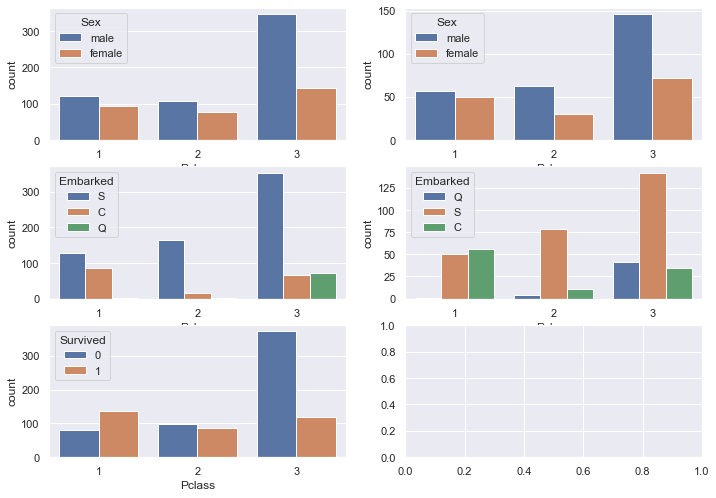

In [12]:
# Count plot for Pessenger class 'Pclass' based on Sex, Embarked and survival
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(3,2)
sns.countplot(x=df_tr['Pclass'], hue=df_tr['Sex'], dodge=True, ax=ax[0,0])
sns.countplot(x=df_te['Pclass'], hue=df_te['Sex'], dodge=True, ax=ax[0,1])

sns.countplot(x=df_tr['Pclass'], hue=df_tr['Embarked'], dodge=True, ax=ax[1,0])
sns.countplot(x=df_te['Pclass'], hue=df_te['Embarked'], dodge=True, ax=ax[1,1])

sns.countplot(x=df_tr['Pclass'], hue=df_tr['Survived'], dodge=True, ax=ax[2,0])

<AxesSubplot:xlabel='Survived', ylabel='count'>

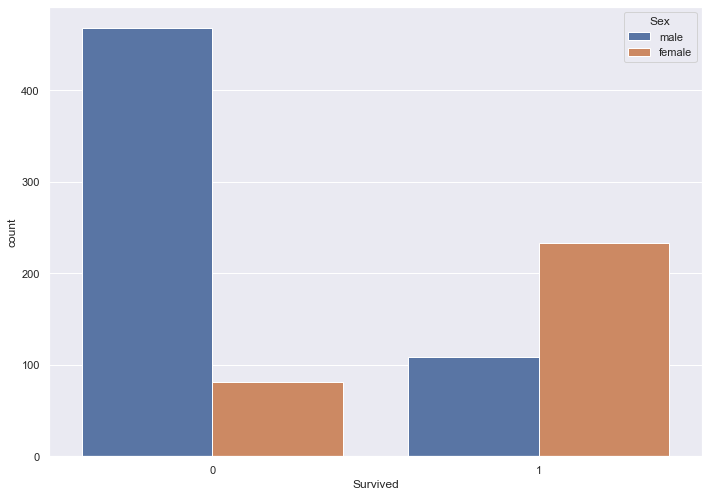

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Survived', data=df_tr, hue='Sex', dodge=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

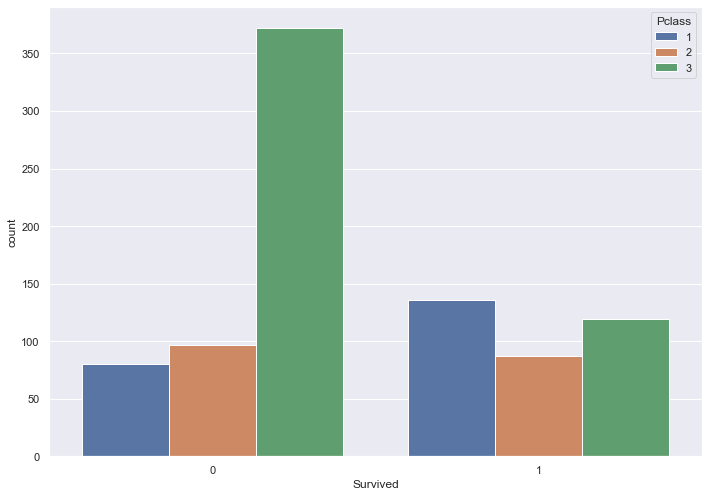

In [14]:
sns.countplot(x='Survived', data=df_tr, hue='Pclass', dodge=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

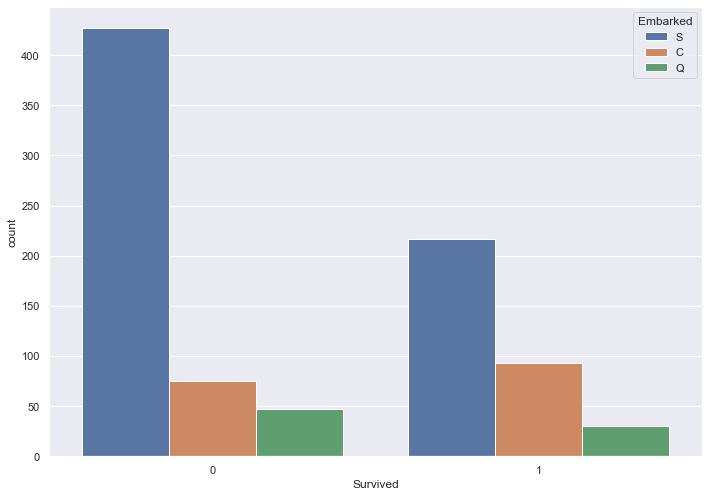

In [15]:
sns.countplot(x='Survived', data=df_tr, hue='Embarked', dodge=True)

# Feature Importance

In [16]:
# Checking missing values in the DataFrame
df_tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Filling out missing values in 'Embarked' column
df_tr.loc[df_tr['Embarked'].isnull(),'Embarked'] = 'S'

In [18]:
# Filling out missing values in 'Age' column with mean value
df_tr.Age = df_tr.Age.fillna(df_tr.Age.mean())

In [19]:
# Droping columns which are not considered/missing data in the analysis
df_Name_drop = df_tr.drop(columns=['Name'])
df_Ticket_drop = df_Name_drop.drop(columns=['Ticket'])
df_Cabin_drop = df_Ticket_drop.drop(columns=['Cabin'])

In [20]:
# Data type for the remaining DataFrame
df_Cabin_drop.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [21]:
# Checking DataFrame after droping columns
df_Cabin_drop.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [22]:
# 'Object' data type is converted into dummy/indicator variables by using dummies function
df = pd.get_dummies(df_Cabin_drop)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [24]:
# Another way of replacing 'Object' data type into integers
#df_tr.loc[df_tr['Sex'] == 'male', 'Gender'] = 1;
#df_tr.loc[df_tr['Sex'] == 'female', 'Gender'] = 0;

In [25]:
# Another way of replacing 'Object' data type into integers
#df_tr.loc[df_tr['Embarked'] == 'C', 'Embarked_'] = 1;
#df_tr.loc[df_tr['Embarked'] == 'Q', 'Embarked_'] = 2;
#df_tr.loc[df_tr['Embarked'] == 'S', 'Embarked_'] = 3;

In [26]:
df.corr().abs()[["Survived"]]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.069809
SibSp,0.035322
Parch,0.081629
Fare,0.257307
Sex_female,0.543351
Sex_male,0.543351
Embarked_C,0.168240


In [27]:
X = df.drop(columns = ['Survived'])
y = df.Survived

In [28]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from sklearn import tree


clf = DecisionTreeClassifier(max_depth= 3)
dtree = clf.fit(X, y)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)

print("feat importance = " + str(feat_importance))

feat importance = [0.         0.0474151  0.01373806 0.00997631 0.         0.0112809
 0.13964796 0.         0.         0.         0.        ]


In [29]:
X.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [30]:
# It is giving error
#tree.export_graphviz(dtree, feature_names = X.columns)
#from graphviz import Source
#Source(tree.export_graphviz(dtree, feature_names = X.columns))

# Modelling

## The steps to building and using a model are:

### 1- Define: 
        What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

### 2- Fit: 
        Capture patterns from provided data. This is the heart of modeling.
### 3- Predict: 
        Just what it sounds like
### 4- Evaluate: 
        Determine how accurate the model's predictions are.

### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1- Define model. Specify a number for random_state to ensure same results each run
dtree = DecisionTreeClassifier(random_state=0)

# Defining test data to train the ERROR calculation model/method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2- Fit model
dtree.fit(X_train,y_train)

feat_importance = dtree.tree_.compute_feature_importances(normalize=False)

print("feat importance = " + str(feat_importance))

feat importance = [0.10524215 0.05147295 0.05604374 0.02145472 0.00568305 0.08132183
 0.         0.13777998 0.00490528 0.00140449 0.00414011]


In [37]:
# 3- Prediction
y_pred =  dtree.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [40]:
#model = DecisionTreeClassifier()
#visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

In [39]:
# 4- Evaluate
accuracy_score(y_test, y_pred)

0.7430167597765364

### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# STEP-1
rf = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP-2
rf.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [42]:
# STEP-3
y_pred =  rf.predict(X_test)

In [43]:
# STEP-4
accuracy_score(y_test, y_pred)

0.8268156424581006

# Testing training data for test DataFrame

In [45]:
df_te = df_te.drop(columns = ['Name', 'Ticket', 'Cabin'])

In [50]:
df_te = pd.get_dummies(df_te)
df_te.Age = df_te.Age.fillna(df_te.Age.mean())
df_te.Fare = df_te.Fare.fillna(df_te.Fare.mean())

In [51]:
df_te.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [52]:
# Random Forest Classifier for test dataframe
rf.predict(df_te)

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,